# MT3510 Statistics Project

For the individual statsitics project, you will develop a Monte Carlo (bootstrap) approach to estimating confidence intervals for linear regression. Don't worry if you haven't heard of these before, below is a description of what these and how to do the basics of these in Python.

## Getting help

Questions and queries are permitted, within reason, and can be directed to Dr Swallow or the week 9 & 10 lab demonstrators. The preferred route of contact for outside the lab is email (bts3@).

## Submitting the project

Submission deadline is 5pm Friday 7th April via MySaint/MMS.

Use the cells provided to write the necessary code and (you should not need any additional cells). Submit a single Notebook file (as with the tutorials).

Late submissions will be dealt with using the standard policy (see [here](https://www.st-andrews.ac.uk/mathematics-statistics/students/taught-modules/late-work/)).

## Marking breakdown

| Code  (70%)                   | Written Answers (30%) |
| --------------------------- | ------------------- |
| Correct results (50%)         | Accuracy (20%)        |
| Readability and style (20%)   | Conciseness (10%)     |

# Background

## Linear regression

Simple linear regression is a common statistical model that aims to find the 'best' line through two potentailly related measurements. For example, you may want to know what the relationship is between student's performance in sub-honours (let's call this $x$) and their subsequent performance in honours courses (let's call this $y$). We might think it makes sense that those who get better grades at sub-honours are more likely to perform well at honours level.

To test this, we fit a line of the form:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\beta_0$ is called the intercept and represents the performance of a student at honours level who obtained a zero at sub-honours (i.e., $x=0$). $\beta_1$ is called the slope parameter and is a measure of the 'steepness' or gradient of the relationship between the two measurements. $\beta_1$ is the amount by which a student's performance at honours will change for every increase of one in their sub-honours grade. $\epsilon$ is an error term that allows for some difference between the line and the corresponding data point (we don't expect the line to go exactly through all the points).

For example, see the follwing plot: $\beta_0$ is the height on the y-axis of the solid black line; $\beta_1$ is the length of the vertical dotted line, showing the increase in $y$ from $x=3$ to $x=4$.

![Linear regression example](./linreg.jpeg)

## Confidence intervals

Confidence intervals are intervals in statistics that enable us to determine likely plausible values for quantities of interest. The commenest way of estimating these intervals is to use statistical theory to determine the behaviours of our estimates, accounting for the fact that we only ever collect data on a subset of the population we are really interested in. For example, if we wanted to know the average height of students in St Andrews, we would likely not be able to measure the height of every student. Instead, we would measure the height of a sample of students and use this sample to try and make inference about the average height of students. 



An alternative approach to the theoretical estimate of confidence intervals is to use Monte Carlo approaches. Here we randomly sample our data many times with replacement (i.e., observations can be selected multiple times). The idea is, following the student height example, is that if we have collected a random sample from all students, the ones we did not measure should be similar to those we did measure and we can use sampling with replacement to generate alternative scenarios. 

In a Monte Carlo approach to constructing confidence intervals, we:

* generate lots of new datasets from the data we have, of the same dimensions as the original dataset
* fit our statistical model to each of these datasets
* extract the quantity of interest
* repeat many times and create an interval from these

We can then use the estimates of the parameters across all these datasets to determine a range of plausible values for the parameters.


### Fitting a linear regerssion in Python

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

#Combine the X matrix with a (column of) 1s to estimate \beta_0
X = sm.add_constant(np.array([5, 15, 25, 35, 45, 55, 65, 75, 85]).reshape((-1, 1)))
y = np.array([5, 20, 14, 32, 22, 38, 35, 45, 51])
parout=np.zeros([100,2])
mod = sm.OLS(y, X)

res = mod.fit()

# Using print(res.summary()) will give you extensive detailss
# of the model fit

# Print beta_0 and beta_1
print(f'params =', res.params)

# Print exact 95% CI (alpha=0.05) for beta_0 and beta_1
print(f'conf interval =', res.conf_int(0.05))

params = [6.08611111 0.51166667]
conf interval = [[-2.91449454 15.08671676]
 [ 0.338182    0.68515133]]


# Assessment


Scrape the data from [this website on CO2 emissions by country](https://www.worldometers.info/co2-emissions/co2-emissions-by-country/). *(Hint: You may be able to use a similar approach to the IMDB example discussed in the lecture, but now you have multiple entries in the table, not just one)*

*(Additional hint: the `str.replace('a', 'b')` function can be applied to `pandas` DataFrame (column) to replace each recurrence of character `a` with the character `b`.)


Develop a Monte Carlo bootstrap simulation procedure to construct a confidence interval for the two linear regression parameters (intercept and slope) using the scraped data. Assume your response variable (y) is CO2 Emissions (tons, 2016) and your covariate (x) is Population (2016).



1. Write a function called `mcsim(df,N,alpha)` which takes as inputs the `Pandas` dataframe `df` you have scraped, the number `N` of Monte Carlo simulations you require, and the confidence level `alpha`. The function should resample the data `N` times, fit a linear model to each new dataset, and store the estimates of intercept and slope. The function should then return a `Pandas` dataframe output with two columns, 'Intercept' and 'Slope', with the rows being the `N` estimates of the parameters. 

2. Run your function for all combinations of $N\in[100,500,1000]$ and $\alpha\in[0.01,0.05,0.1]$ and store as a dictionary where the keys are of the form `N_alpha`. Produce histograms of your outputs for each combination as subplots in a figure. The rows of subfigures should be increasing N and the columns increasing $\alpha$.

3. Calculate the confidence region for each setting and save to a python dictionary object called `confint`, where the rows are increasing sizes of `N` and the columns are increasing `alpha` and keys are of the form `N_alpha`. 

4. Fit a linear model to the original dataset and extract the exact confidence interval for the two parameters. 

5. Add vertical lines to the histogram to show the exact and approximate regions clearly in different colours and/or line types. Each plot title should portray what the setting values are for that plot.

6. Write a short description (no more than 150 words) on your procedure and comparing your MC estimates with this exact interval in the box below.

In [2]:
#Your Python data scraping code here

import pandas as pd

# Use pd.read to convert the data on the website to a table
table = pd.read_html('https://www.worldometers.info/co2-emissions/co2-emissions-by-country/')
df = pd.DataFrame(table[0])          # Convert the table to a Data Frame
df = df.drop('#', axis=1)            # Remove an arbitery Indexing axis

# Good practise to standardise the Independant Variables that we will use later
df['Population (2016)'] = (df['Population (2016)']-df['Population (2016)'].mean())/df['Population (2016)'].std()
df

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
0,China,10432751400,-0.28%,9.947502,7.38,29.18%
1,United States,5011686600,-2.01%,2.073645,15.52,14.02%
2,India,2533638100,4.71%,9.301359,1.91,7.09%
3,Russia,1661899300,-2.13%,0.790912,11.44,4.65%
4,Japan,1239592060,-1.21%,0.664529,9.70,3.47%
...,...,...,...,...,...,...
204,Anguilla,30262,1.52%,-0.257419,2.10,0.00%
205,Saint Helena,13128,2.62%,-0.257480,2.20,0.00%
206,Saint Pierre & Miquelon,8842,1.51%,-0.257480,1.49,0.00%
207,Faeroe Islands,1953,0.60%,-0.257175,0.04,0.00%


In [3]:
#Your MC simulation code here

# Question 1:

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

def mcsim(df,N,alpha):
    
    intercept = np.zeros(N)
    slope = np.zeros(N)
    
    for i in range(N):
        newsamp = np.random.choice(len(df),size=len(df),replace=True)  # Randomly selecting a new sample from orginal data
        newdat = df.iloc[newsamp,]
    
        y = np.array(newdat["CO2 Emissions (tons, 2016)"])
        X = sm.add_constant(np.array(newdat["Population (2016)"]).reshape((-1, 1)))
    
        mod = sm.OLS(y, X)                                             # Running regression on X and y variables above

        res = mod.fit()                                                  
        
        intercept[i] = res.params[0]
        slope[i] = res.params[1]
        
    bootdf = pd.DataFrame({"Intercept" : intercept,                    # New Data Frame contaning Slope and Intercept Values
                           "Slope" : slope})                           # from each new sample
        
    return bootdf

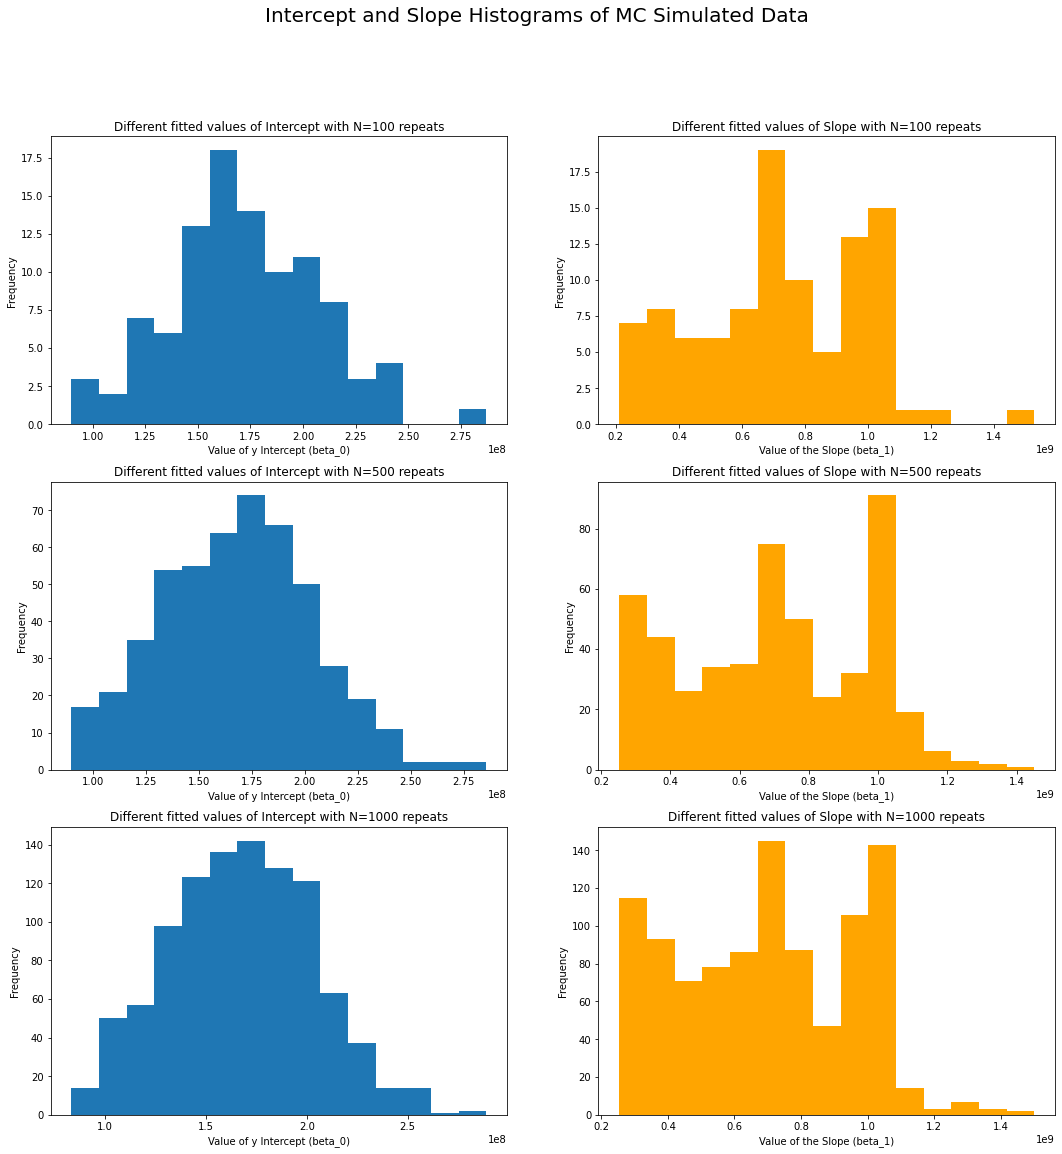

In [4]:
# Question 2:

# Define a dictionary with cominations of N and alpha as required

dictionary = {"100_0.01" : mcsim(df,100,0.01),
              "100_0.05" : mcsim(df,100,0.05),
              "100_0.1" : mcsim(df,100,0.1),
              "500_0.01" : mcsim(df,500,0.01),
              "500_0.05" : mcsim(df,500,0.05),
              "500_0.1" : mcsim(df,500,0.1),
              "1000_0.01" : mcsim(df,1000,0.01),
              "1000_0.05" : mcsim(df,1000,0.05),
              "1000_0.1" : mcsim(df,1000,0.1)}
# No order was required, so match to future dictionary format


fig, ax = plt.subplots(ncols=2, nrows=3,figsize=(18, 18))
fig.suptitle('Intercept and Slope Histograms of MC Simulated Data' , fontsize=20)
axs = [[ax[0,0],ax[0,1]], 
       [ax[1,0],ax[1,1]], 
       [ax[2,0],ax[2,1]]]

i=0
N_vals = [100, 500, 1000]

for ax in axs:
    data = mcsim(df, N_vals[i],0)                                     # Run Function inside loop so the same 'bootdf' is used for each pair of graphs
    axs[i][0].hist(np.array(data["Intercept"]), bins=15)
    axs[i][1].hist(np.array(data["Slope"]), color = "orange", bins =15)
    axs[i][0].set_title(f"Different fitted values of Intercept with N={N_vals[i]} repeats")
    axs[i][0].set_xlabel("Value of y Intercept (beta_0)")
    axs[i][0].set_ylabel("Frequency")
    axs[i][1].set_title(f"Different fitted values of Slope with N={N_vals[i]} repeats")
    axs[i][1].set_xlabel("Value of the Slope (beta_1)")
    axs[i][1].set_ylabel("Frequency")
    i = i+1

In [12]:
# Question 3:

# Define new function that will do the same as initial function but now outputs a confidence region

def mcsimCI(df, N, alpha):                
    
    sim = mcsim(df, N, alpha)
    
    intercept = sim["Intercept"].to_list()
    slope = sim["Slope"].to_list()
        
    CI = [np.quantile(intercept, [alpha/2, 1 -alpha/2]),  # use np.quantile to ensure 1 - alpha of data is within the region
          np.quantile(slope, [alpha/2, 1 -alpha/2])]
    return sim, CI

# Defining a dictionary of the cofidence regions with varying N and alpha as required
confint = {"100_0.01" : mcsimCI(df,100,0.01)[1],
           "100_0.05" : mcsimCI(df,100,0.05)[1],
           "100_0.1" : mcsimCI(df,100,0.1)[1],
           "500_0.01" : mcsimCI(df,500,0.01)[1],
           "500_0.05" : mcsimCI(df,500,0.05)[1],
           "500_0.1" : mcsimCI(df,500,0.1)[1],
           "1000_0.01" : mcsimCI(df,1000,0.01)[1],
           "1000_0.05" : mcsimCI(df,1000,0.05)[1],
           "1000_0.1" : mcsimCI(df,1000,0.1)[1]}
# As dictionarys do not have rows or columns I have kept N constant whilst increasing alpha and done this for all N

array([2.64964744e+08, 1.31322199e+09])

In [6]:
# Question 4:

# Running the same Linear Regression as above on the orginal data to get Exact Confidence Intervals

X = sm.add_constant(np.array(df['Population (2016)'].to_list()).reshape((-1, 1)))
y = np.array(df['CO2 Emissions (tons, 2016)'].to_list())

parout=np.zeros([100,2])
mod = sm.OLS(y, X)

res = mod.fit()

#Storing Exact Confidence Interval values in a dictionary to call upon later for efficiency

exact_confint = {"0.01" : res.conf_int(0.01),
                 "0.05" : res.conf_int(0.05),
                 "0.1" : res.conf_int(0.1)}

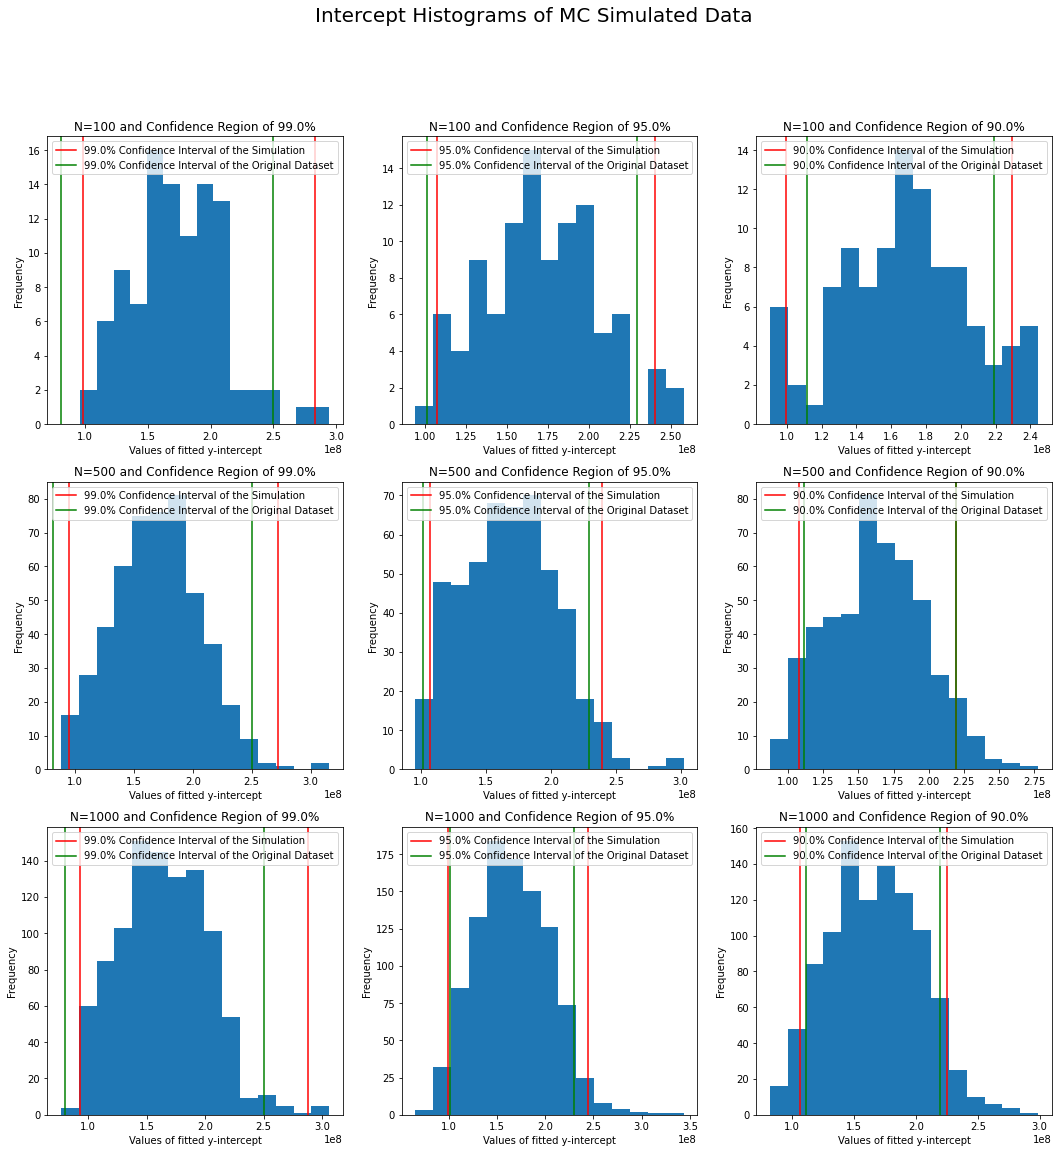

In [7]:
# Question 5:

# Intercept Histograms

fig, ax = plt.subplots(ncols=3, nrows=3,figsize=(18, 18))
fig.suptitle('Intercept Histograms of MC Simulated Data' , fontsize=20)

N_vals = [100, 500, 1000]
alpha_vals = [0.01, 0.05, 0.1]

for i in range(len(N_vals)):
    for j in range(len(alpha_vals)):
        data = mcsimCI(df, N_vals[i], alpha_vals[j])       # Run data at start of loop so histogram mathes confidence region
        bootdf = data[0]
        CIs = data[1]
        
        ax[i,j].hist(np.array(bootdf["Intercept"]), bins=15)
        ax[i,j].set_title(f"N={N_vals[i]} and Confidence Region of {(1 - alpha_vals[j])*100}%")
        ax[i,j].set_xlabel("Values of fitted y-intercept")
        ax[i,j].set_ylabel("Frequency")
        
        ax[i,j].axvline(x = CIs[0][0], c="r", label = f"{(1 - alpha_vals[j])*100}% Confidence Interval of the Simulation")
        ax[i,j].axvline(x = CIs[0][1], c="r")
        ax[i,j].axvline(x = exact_confint[f"{alpha_vals[j]}"][0][0], c="g", label = f"{(1 - alpha_vals[j])*100}% Confidence Interval of the Original Dataset")
        ax[i,j].axvline(x = exact_confint[f"{alpha_vals[j]}"][0][1], c="g")
        
        ax[i,j].legend();
        

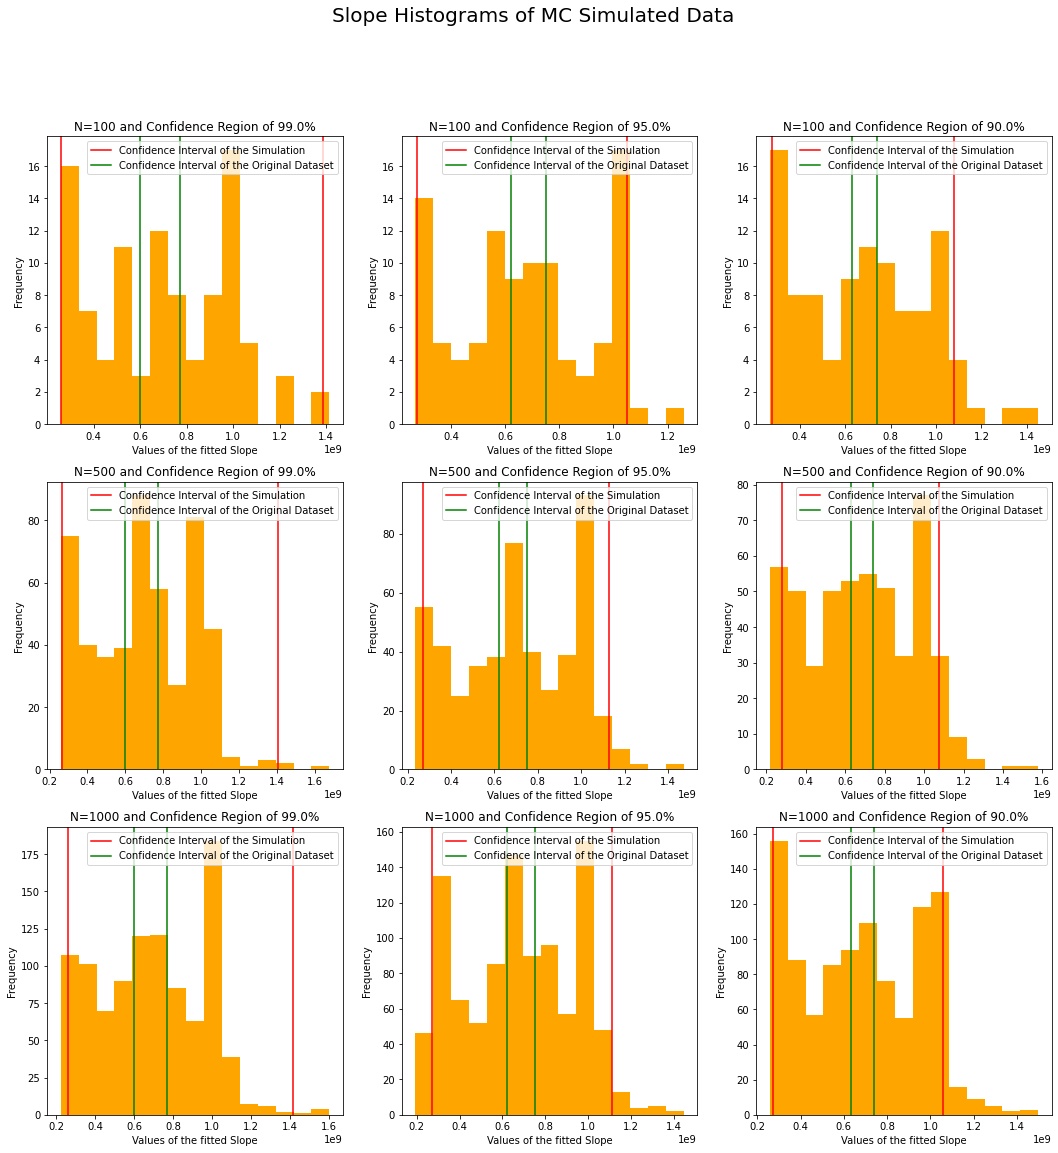

In [8]:
# Question 5 cont.

# Slope Histograms

fig, ax = plt.subplots(ncols=3, nrows=3,figsize=(18, 18))
fig.suptitle('Slope Histograms of MC Simulated Data' , fontsize=20)

N_vals = [100, 500, 1000]
alpha_vals = [0.01, 0.05, 0.1]

for i in range(len(N_vals)):
    for j in range(len(alpha_vals)):
        data = mcsimCI(df, N_vals[i], alpha_vals[j])          # Run data at start of loop so histogram mathes confidence region
        bootdf = data[0]
        CIs = data[1]
        
        ax[i,j].hist(np.array(bootdf["Slope"]), color = "orange", bins=15)
        ax[i,j].set_title(f"N={N_vals[i]} and Confidence Region of {(1 - alpha_vals[j])*100}%")
        ax[i,j].set_xlabel("Values of the fitted Slope")
        ax[i,j].set_ylabel("Frequency")
        
        ax[i,j].axvline(x = CIs[1][0], c="red", label = "Confidence Interval of the Simulation")
        ax[i,j].axvline(x = CIs[1][1], c="red")
        ax[i,j].axvline(x = exact_confint[f"{alpha_vals[j]}"][1][0], c="g", label = "Confidence Interval of the Original Dataset")
        ax[i,j].axvline(x = exact_confint[f"{alpha_vals[j]}"][1][1], c="g")
        
        ax[i,j].legend();

N new samples were created by randomly choosing countries, with replacement, from the original scraped data until it was the same length as the original data. Linear Regression performed on each of them separately, giving N values of $\beta_0$ and $\beta_1$. 

 

A significant difference between the exact and estimated regions for the Slope was observed. This difference was reduced as N and $\alpha$ increased. Our data has outliers (marked with red “x”). The underlying uncertainty is much greater when these points are included. As the new sample is randomly chosen the outliers may be both included (possibly multiple times), only one included, or not included. Resulting in large spread of slope values. Removing outliers would result in a smaller difference between regions (see Histograms below). 

 

For intercept the two regions are close together, getting closer as N and $\alpha$ increase, in general. Most countries have a low value of CO2 Emissions compared to outliers (see plot below). Therefore, when randomly selecting countries, the majority will have a low y-value. $\beta_0$ is closely related to average y-value, thus due to the clump of points around the origin this should be similar for all new samples. Hence matching the exact CI.  
(199 words)

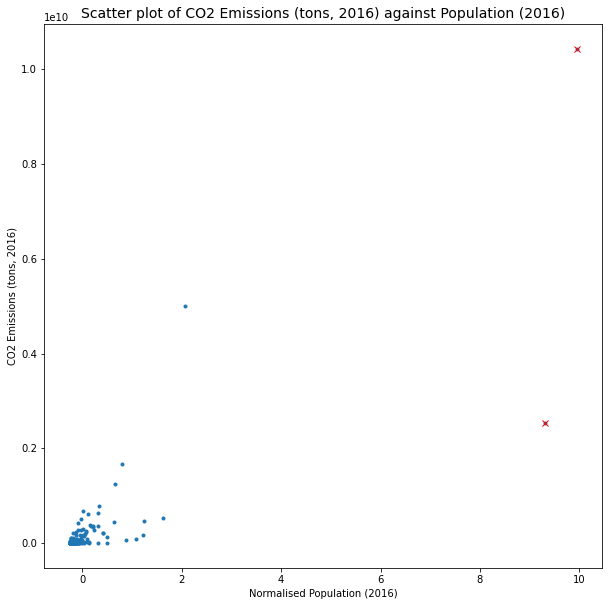

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
#len(df['Population (2016)']) - len(df['CO2 Emissions (tons, 2016)'])
ax.plot(df['Population (2016)'], df['CO2 Emissions (tons, 2016)'], '.')
ax.plot(9.947502, 10432751400, 'x', color='red')
ax.plot(9.301359, 2533638100, 'x', color='red')
ax.set_title("Scatter plot of CO2 Emissions (tons, 2016) against Population (2016)", fontsize=14)
ax.set_xlabel("Normalised Population (2016)")
ax.set_ylabel("CO2 Emissions (tons, 2016)");

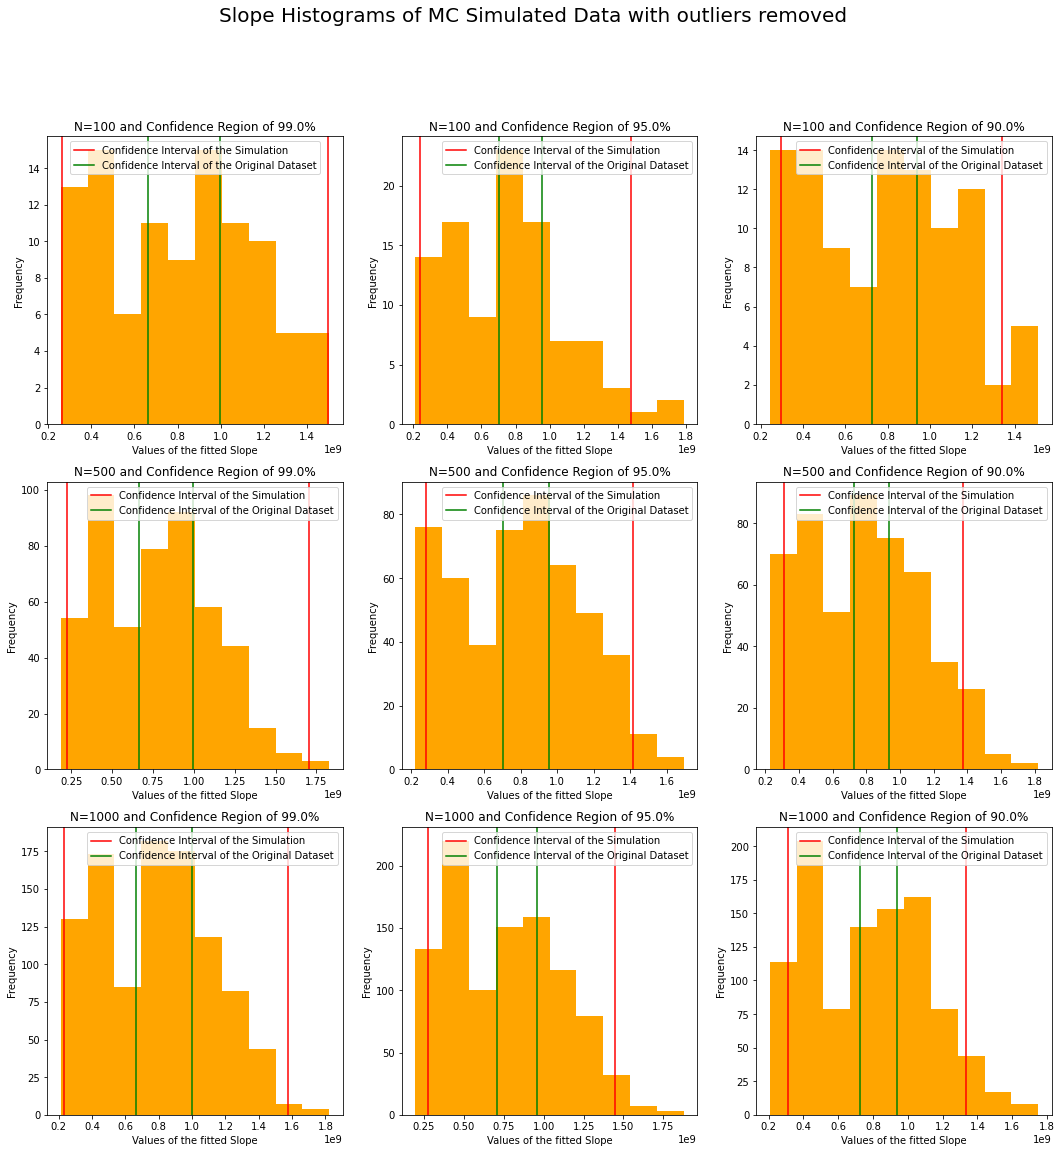

In [10]:
# Run the exact same code as above on the new data frame without the two identified outliers
# Means the histograms and confidence regions outputted can be compared to ones above that include the outliers

# Reuse data scraping code so it wont affect code above

table = pd.read_html('https://www.worldometers.info/co2-emissions/co2-emissions-by-country/')
df1 = pd.DataFrame(table[0])          # Convert the table to a Data Frame
df1 = df1.drop('#', axis=1)            # Remove an arbitery Indexing axis

# Good practise to standardise the Independant Variables that we will use later
df1['Population (2016)'] = (df1['Population (2016)']-df1['Population (2016)'].mean())/df1['Population (2016)'].std()

df1 = df1.drop(0, axis=0)   # Remove outlier (China)
df1 = df1.drop(2, axis=0)   # Remove outlier (India)

# Run the exact same code as above on the new data frame without the two identified outliers
# Means the histograms and confidence regions outputted can be compared to ones above that include the outliers

#Find exact CI of new data (df1)
X = sm.add_constant(np.array(df1['Population (2016)'].to_list()).reshape((-1, 1)))
y = np.array(df1['CO2 Emissions (tons, 2016)'].to_list())

parout=np.zeros([100,2])
mod = sm.OLS(y, X)

res = mod.fit()



exact_confint = {"0.01" : res.conf_int(0.01),
                 "0.05" : res.conf_int(0.05),
                 "0.1" : res.conf_int(0.1)}

# Slope Histograms
fig, ax = plt.subplots(ncols=3, nrows=3,figsize=(18, 18))
fig.suptitle('Slope Histograms of MC Simulated Data with outliers removed' , fontsize=20)

N_vals = [100, 500, 1000]
alpha_vals = [0.01, 0.05, 0.1]

for i in range(len(N_vals)):
    for j in range(len(alpha_vals)):
        data = mcsimCI(df1, N_vals[i], alpha_vals[j])
        bootdf = data[0]
        CIs = data[1]
        
        ax[i,j].hist(np.array(bootdf["Slope"]), color = "orange")
        ax[i,j].set_title(f"N={N_vals[i]} and Confidence Region of {(1 - alpha_vals[j])*100}%")
        ax[i,j].set_xlabel("Values of the fitted Slope")
        ax[i,j].set_ylabel("Frequency")
        
        ax[i,j].axvline(x = CIs[1][0], c="red", label = "Confidence Interval of the Simulation")
        ax[i,j].axvline(x = CIs[1][1], c="red")
        ax[i,j].axvline(x = exact_confint[f"{alpha_vals[j]}"][1][0], c="g", label = "Confidence Interval of the Original Dataset")
        ax[i,j].axvline(x = exact_confint[f"{alpha_vals[j]}"][1][1], c="g")
        
        ax[i,j].legend();
        